In [1]:
# Dépendances
library(readr)
# Installer ggplot2 si ce n'est pas déjà fait
if (!require(ggplot2)) {
  install.packages("ggplot2")
}
# Charger ggplot2
library(ggplot2)
# Charger dplyr
library(dplyr)

Warning message:
“package ‘readr’ was built under R version 4.1.3”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Chargement des données
df <- read_csv('./data/covid_testing.csv')

Rows: 15524 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): fake_first_name, fake_last_name, gender, test_id, clinic_name, resu...
dbl (8): subject_id, pan_day, age, drive_thru_ind, ct_result, orderset, col_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Afficher les premières lignes du DataFrame
head(df)

# Afficher des informations sur le DataFrame
str(df)

# Afficher les noms des colonnes
colnames(df)

# Exemple d'affichage d'une valeur formatée
nom_colonne <- colnames(df)[1]
valeur <- df[1, 1]

# Utiliser sprintf pour formater la chaîne de caractères
message <- sprintf("La première valeur de la colonne '%s' est %s.", nom_colonne, valeur)

# Afficher le message
print(message)

subject_id,fake_first_name,fake_last_name,gender,pan_day,test_id,clinic_name,result,demo_group,age,drive_thru_ind,ct_result,orderset,payor_group,patient_class,col_rec_tat,rec_ver_tat
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1412,jhezane,westerling,female,4,covid,inpatient ward a,negative,patient,0.0,0,45,0,government,inpatient,1.4,5.2
533,penny,targaryen,female,7,covid,clinical lab,negative,patient,0.0,1,45,0,commercial,not applicable,2.3,5.8
9134,grunt,rivers,male,7,covid,clinical lab,negative,patient,0.8,1,45,1,NA,NA,7.3,4.7
8518,melisandre,swyft,female,8,covid,clinical lab,negative,patient,0.8,1,45,1,NA,NA,5.8,5.0
8967,rolley,karstark,male,8,covid,emergency dept,negative,patient,0.8,0,45,1,government,emergency,1.2,6.4
11048,megga,karstark,female,8,covid,oncology day hosp,negative,patient,0.8,0,45,0,commercial,recurring outpatient,1.4,7.0


spc_tbl_ [15,524 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ subject_id     : num [1:15524] 1412 533 9134 8518 8967 ...
 $ fake_first_name: chr [1:15524] "jhezane" "penny" "grunt" "melisandre" ...
 $ fake_last_name : chr [1:15524] "westerling" "targaryen" "rivers" "swyft" ...
 $ gender         : chr [1:15524] "female" "female" "male" "female" ...
 $ pan_day        : num [1:15524] 4 7 7 8 8 8 9 9 9 9 ...
 $ test_id        : chr [1:15524] "covid" "covid" "covid" "covid" ...
 $ clinic_name    : chr [1:15524] "inpatient ward a" "clinical lab" "clinical lab" "clinical lab" ...
 $ result         : chr [1:15524] "negative" "negative" "negative" "negative" ...
 $ demo_group     : chr [1:15524] "patient" "patient" "patient" "patient" ...
 $ age            : num [1:15524] 0 0 0.8 0.8 0.8 0.8 0.8 0 0 0.9 ...
 $ drive_thru_ind : num [1:15524] 0 1 1 1 0 0 1 0 1 1 ...
 $ ct_result      : num [1:15524] 45 45 45 45 45 45 45 45 45 45 ...
 $ orderset       : num [1:15524] 0 0 1 1 1 0 1 1 1 1 ...
 $

[1] "subject_id"      "fake_first_name" "fake_last_name"  "gender"         
 [5] "pan_day"         "test_id"         "clinic_name"     "result"         
 [9] "demo_group"      "age"             "drive_thru_ind"  "ct_result"      
[13] "orderset"        "payor_group"     "patient_class"   "col_rec_tat"    
[17] "rec_ver_tat"

[1] "La première valeur de la colonne 'subject_id' est 1412."


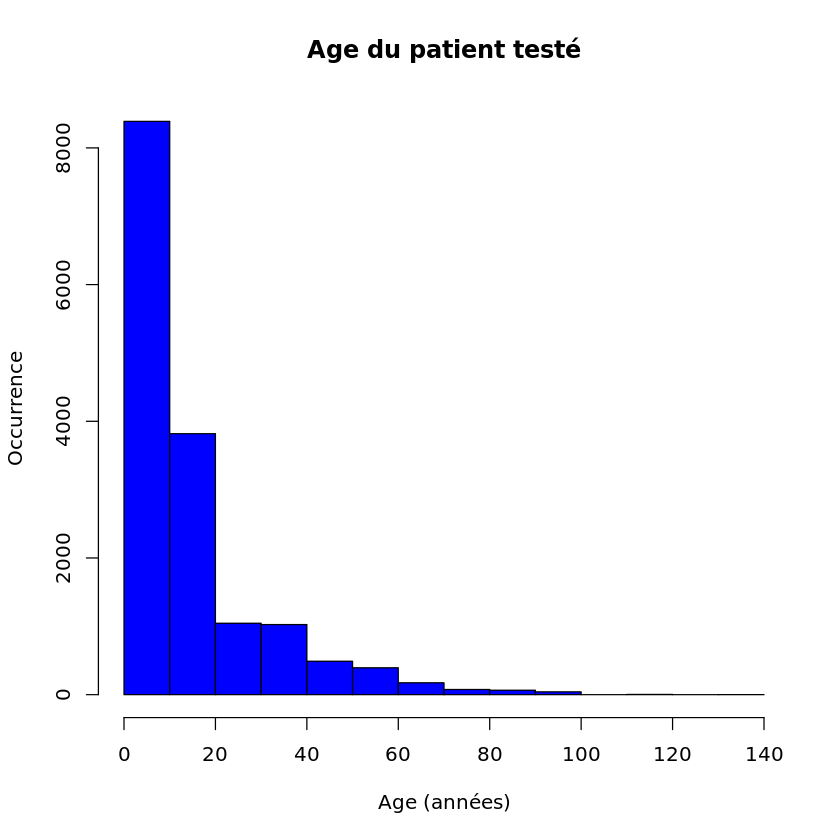

In [5]:
# Créer un histogramme pour la colonne "age"
hist(df$age, main="Age du patient testé", xlab="Age (années)", ylab="Occurrence", col="blue", border="black")



In [6]:
# Résumé statistique de la colonne age
print(summary(df$age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    9.00   14.19   18.00  138.00 


In [7]:
# Regroupement des tests par jour
ntests_per_day_df <- df %>%
  group_by(pan_day) %>%
  summarise(count = n()) %>%
  ungroup()

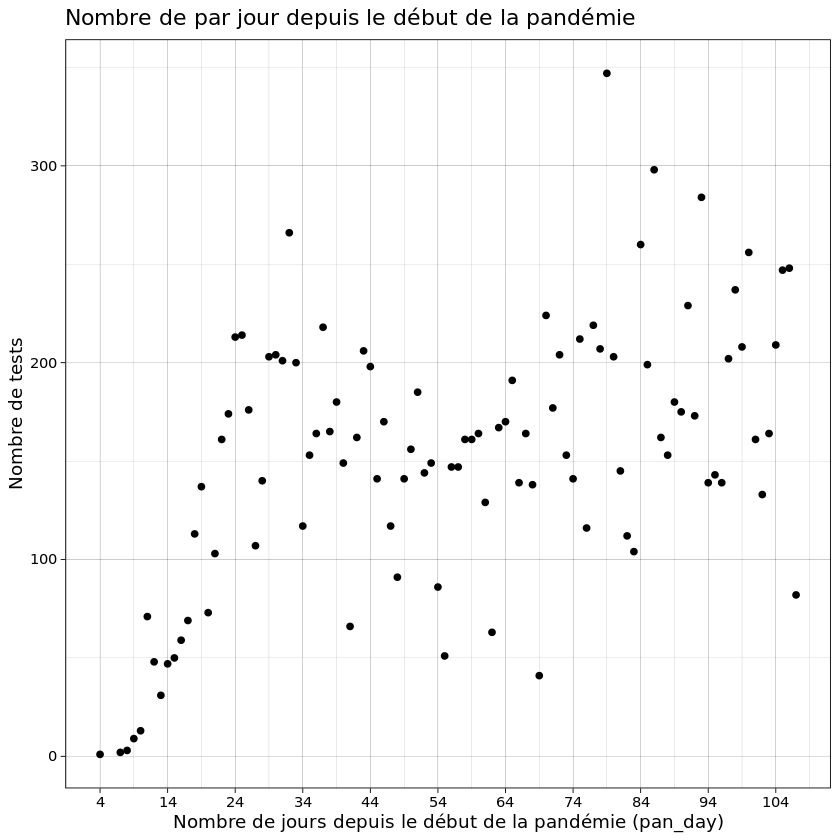

In [8]:
# Graphique XY
p <- ggplot(ntests_per_day_df, aes(x = as.numeric(pan_day), y = count)) +
  geom_point() +
  labs(title = "Nombre de par jour depuis le début de la pandémie",
       x = "Nombre de jours depuis le début de la pandémie (pan_day)",
       y = "Nombre de tests") +
  scale_x_continuous(breaks = seq(min(ntests_per_day_df$pan_day), max(ntests_per_day_df$pan_day), by = 10)) +
  theme_linedraw()
print(p)